# Day9. 심화과제


Req-7. 명세서 9p의 내용을 따라 Face Detection을 하는 코드를 작성하고 실행해 보세요.

In [22]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [16]:
!pip install face_recognition

In [0]:
import cv2,os
import face_recognition as fr
from IPython.display import Image,display
from matplotlib import pyplot as plt

image_path = "/gdrive/My Drive/colab/girl.jpg"

In [0]:
image = fr.load_image_file(image_path)
face_locations = fr.face_locations(image)

for(top,right,bottom,left) in face_locations:
  cv2.rectangle(image,(left,top),(right,bottom),(0,255,0),3)

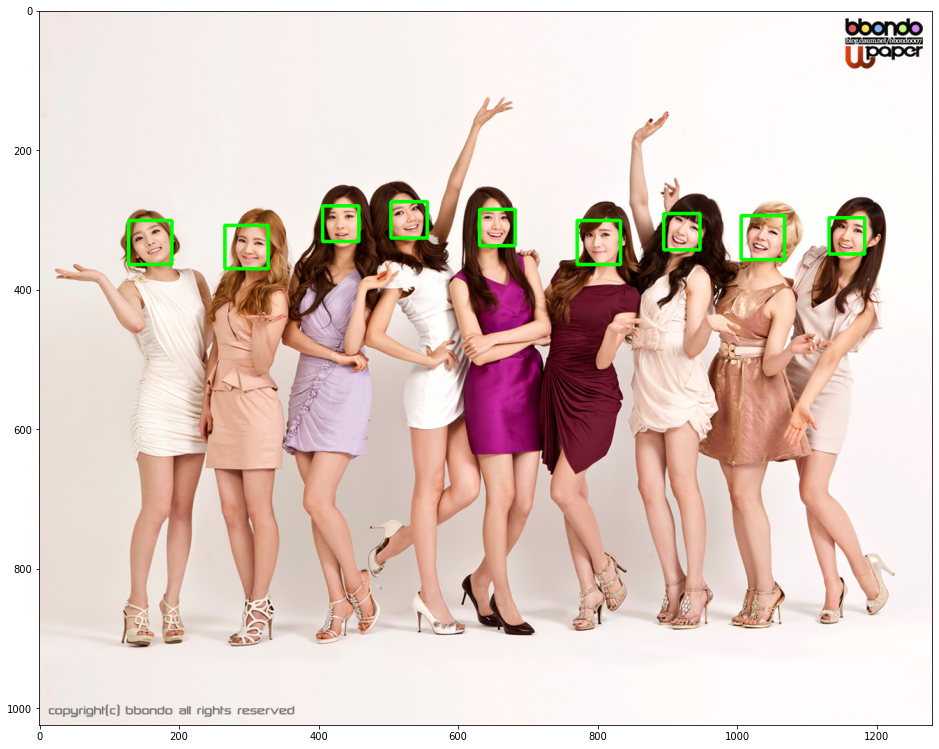

In [29]:
plt.rcParams["figure.figsize"] = (16,16)
plt.imshow(image)
plt.show()

Req-8. 명세서 12p를 참고하여 4명의 인물사진에서 얼굴을 감지하여 인코딩을 한 후 새로운 인물사진 unknown을 입력 받아 기존 4명의 얼굴 중 동일인을 찾는 코드를 구현 및 실행해 보세요.


In [0]:
plt.rcParams["figure.figsize"] = (1,1)

known_person_list = []
known_person_list.append(fr.load_image_file("/gdrive/My Drive/colab/1.jpg"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/colab/2.jpg"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/colab/3.jpg"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/colab/4.jpg"))

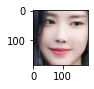

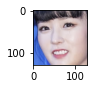

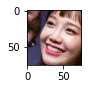

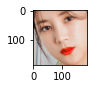

In [31]:
known_face_list = []
for person in known_person_list:
  top, right,bottom,left = fr.face_locations(person)[0]
  face_image = person[top:bottom, left:right]

  known_face_list.append(face_image)

for face in known_face_list:
  plt.imshow(face)
  plt.show()

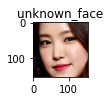

In [33]:
unknown_person = fr.load_image_file("/gdrive/My Drive/colab/5.jpg")

top, right, bottom, left = fr.face_locations(unknown_person)[0]
unknown_face = unknown_person[top:bottom, left:right]

plt.title("unknown_face")
plt.imshow(unknown_face)
plt.show()

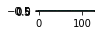

In [35]:
enc_unknown_face = fr.face_encodings(unknown_face)

plt.imshow(enc_unknown_face)
plt.show()

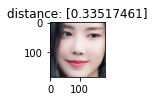

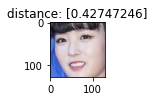

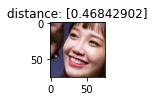

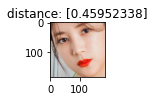

In [36]:
for face in known_face_list:
  enc_known_face = fr.face_encodings(face)
  distance = fr.face_distance(enc_known_face,enc_unknown_face[0])

  plt.title("distance: " + str(distance))
  plt.imshow(face)
  plt.show()